## Import library

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from IPython.display import Image 
import pydotplus

# Compare the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from numpy.core.umath_tests import inner1d

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

# I. Data Exploration

In [235]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.shape

(1470, 35)

In [236]:
#the number of attrition and retention
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [237]:
#percentage of attrition and percentage of retention
Attrition_Rate=df.Attrition.value_counts()/len(df)
print(f"No Attrition:{Attrition_Rate[0]*100:.2f}%")
print(f"Attrition:{Attrition_Rate[1]*100:.2f}%")

No Attrition:83.88%
Attrition:16.12%


### A. Use charts to show the relationship between variables

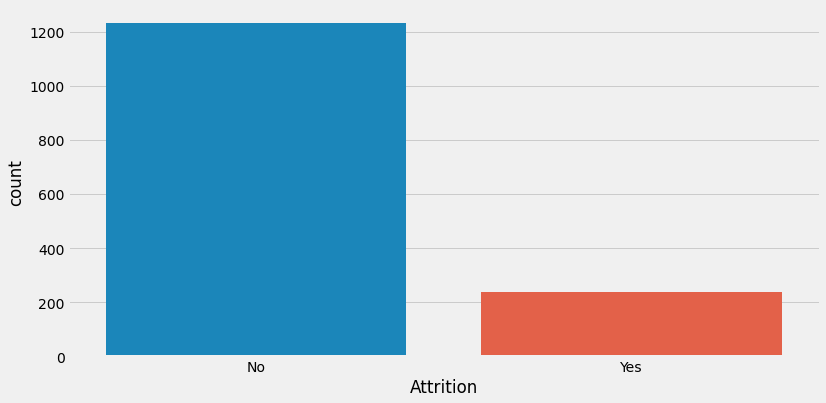

In [238]:
sns.countplot(x='Attrition', data=df,order={'No','Yes'})
df_1 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

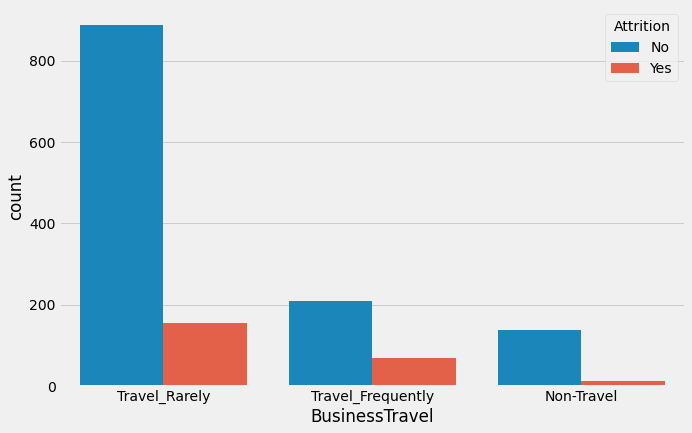

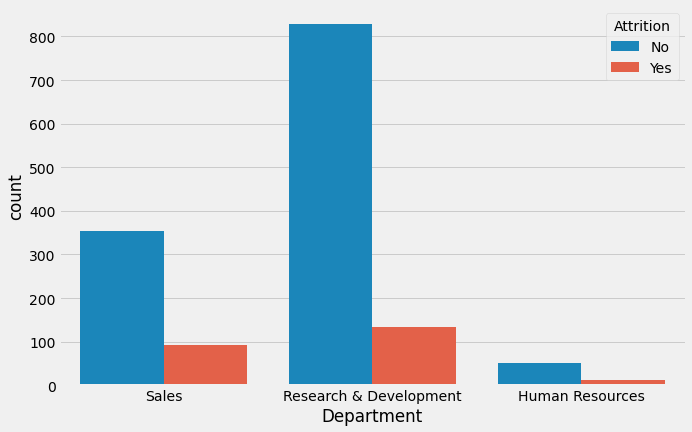

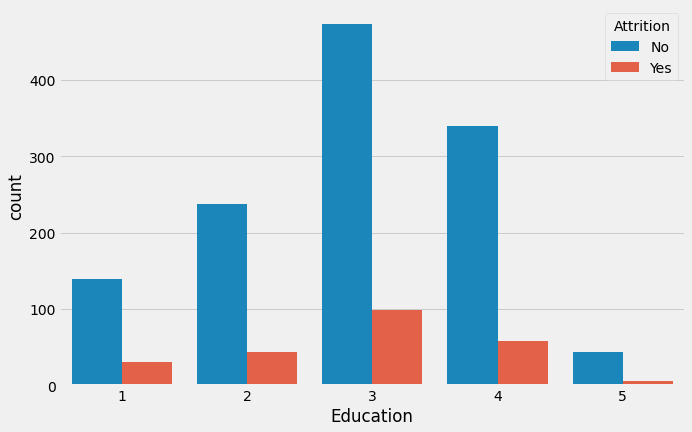

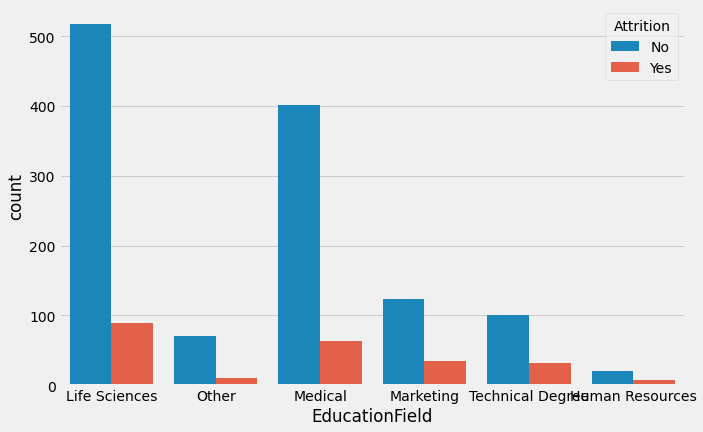

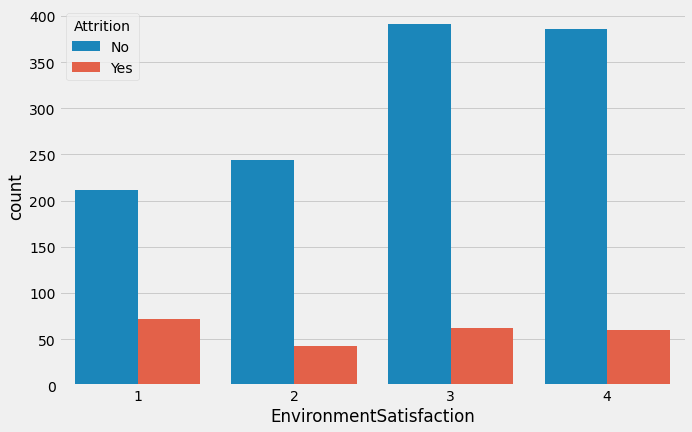

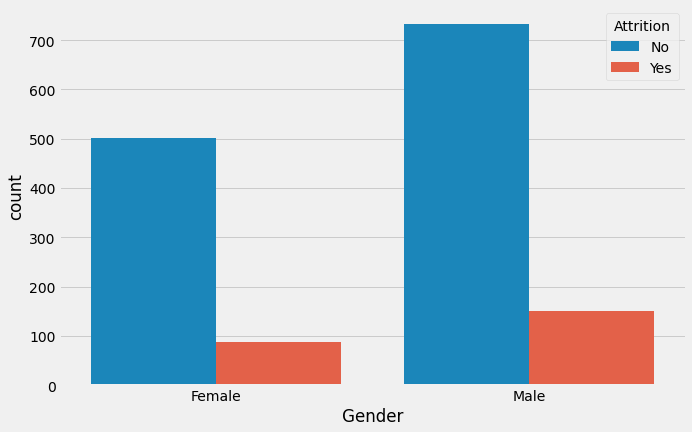

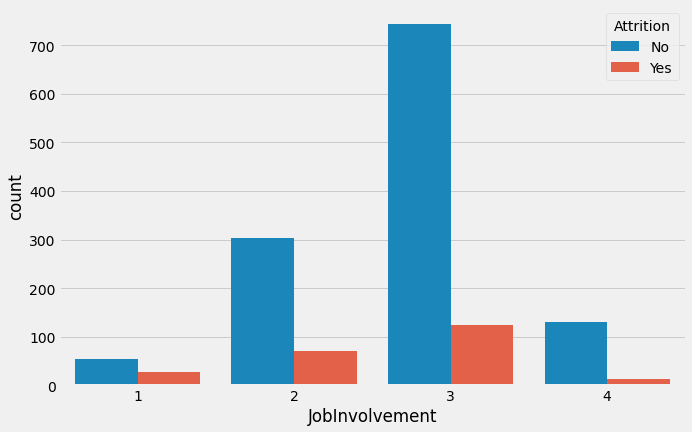

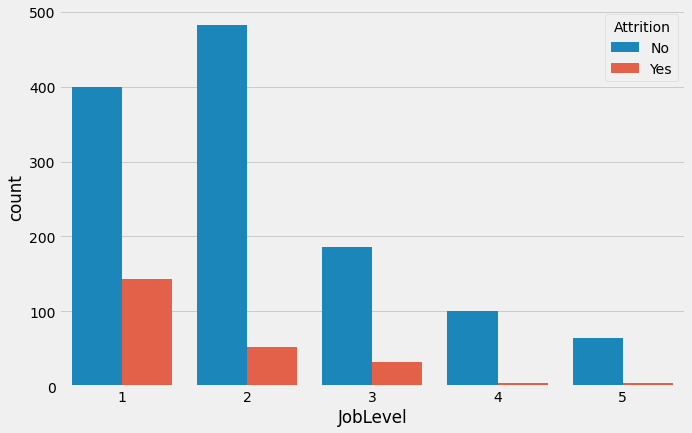

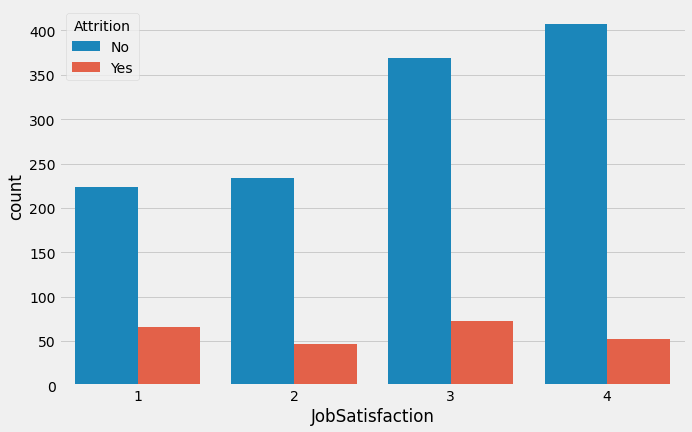

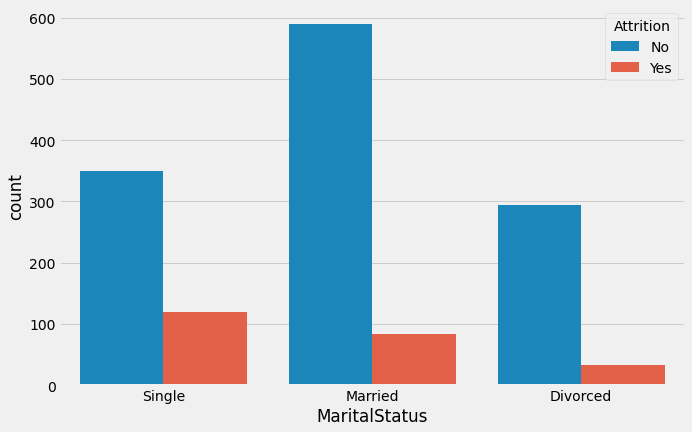

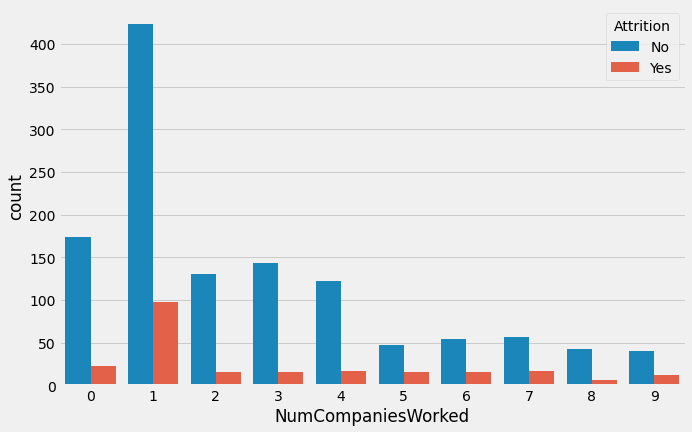

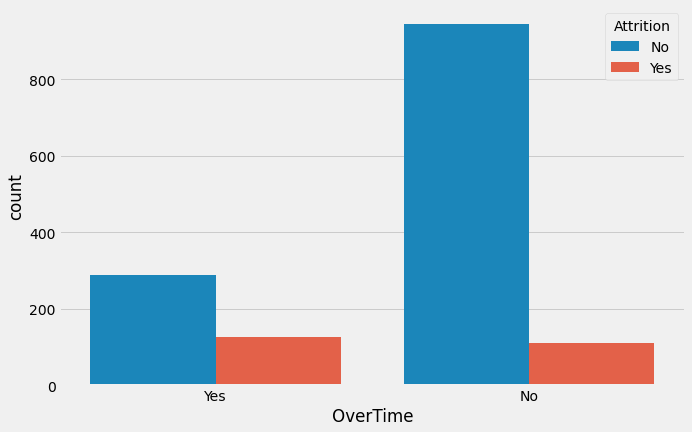

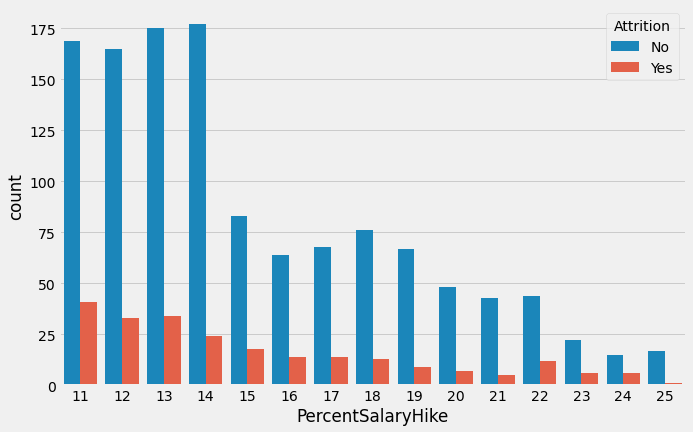

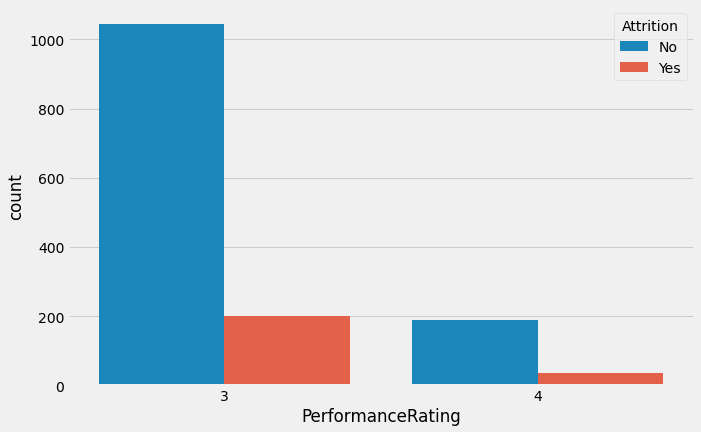

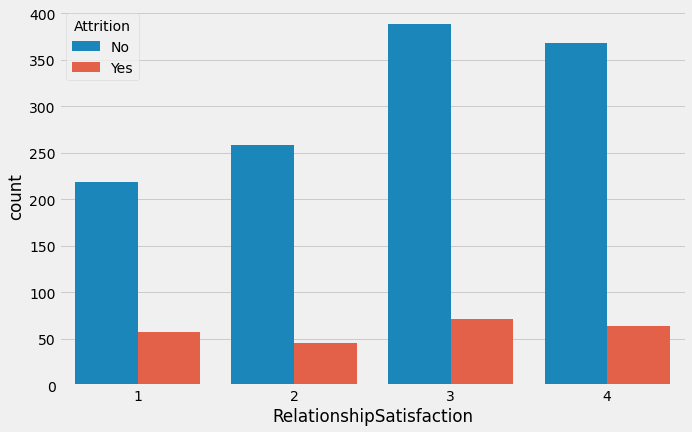

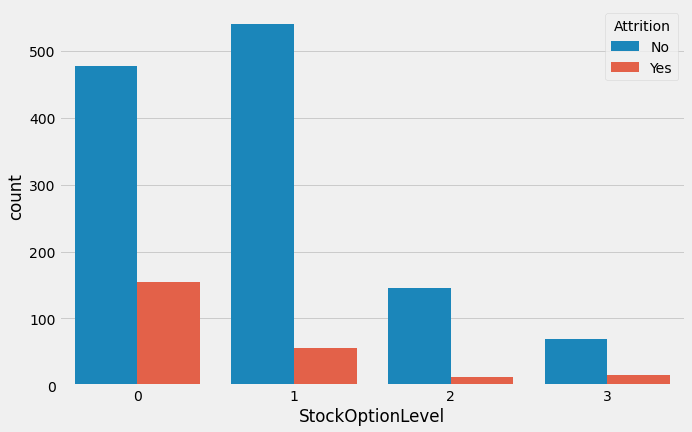

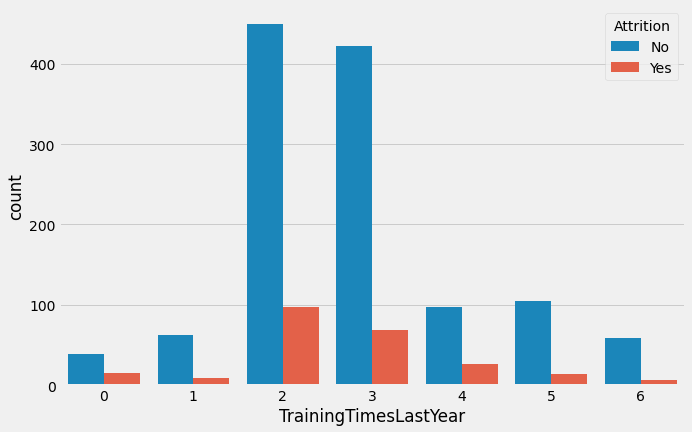

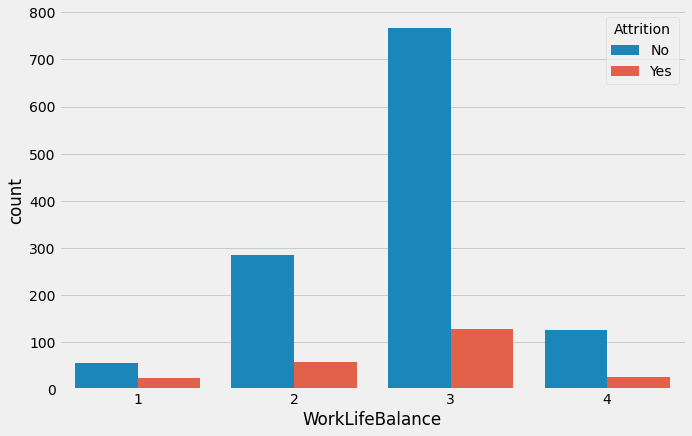

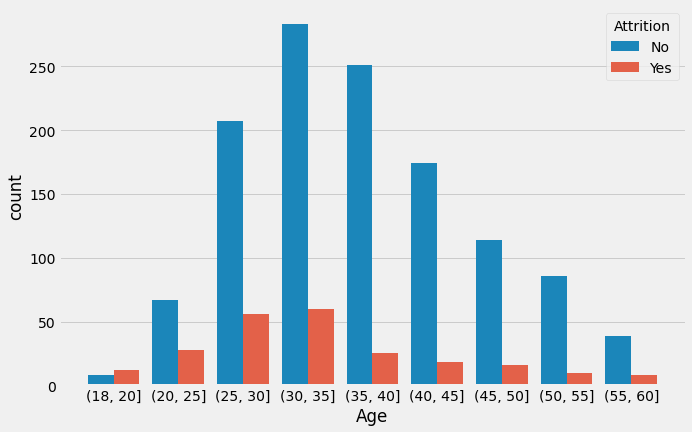

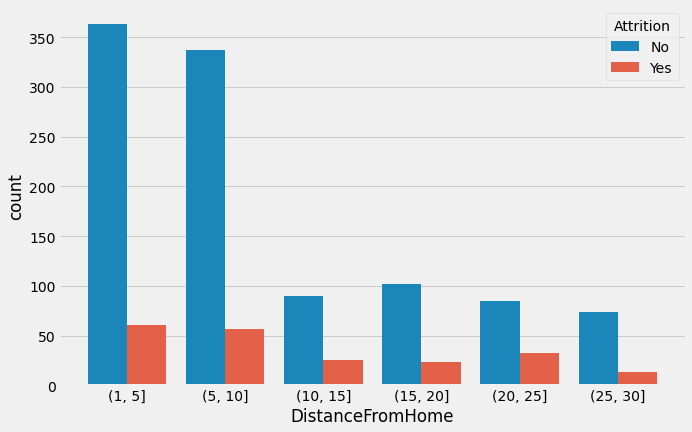

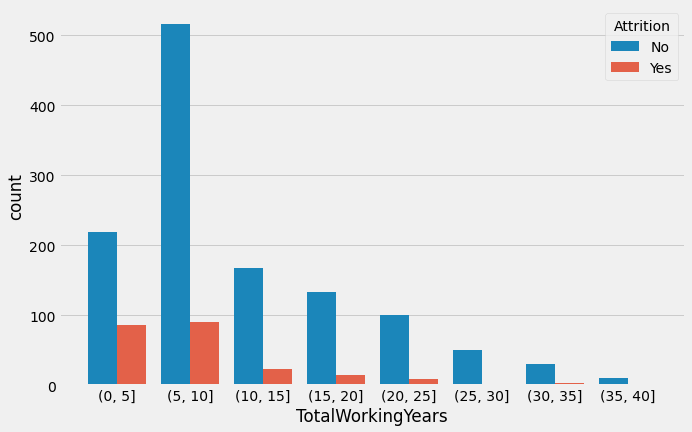

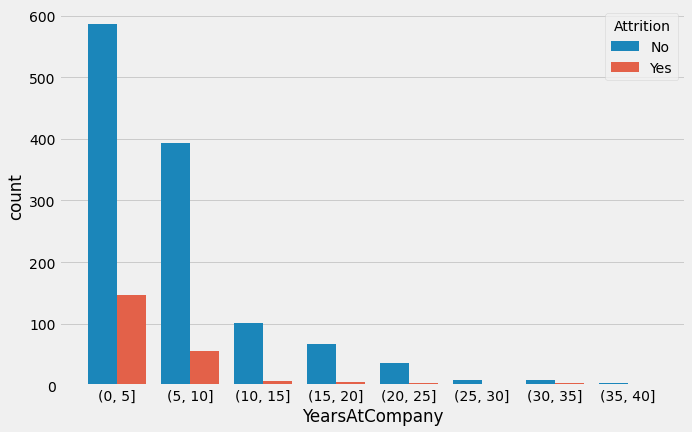

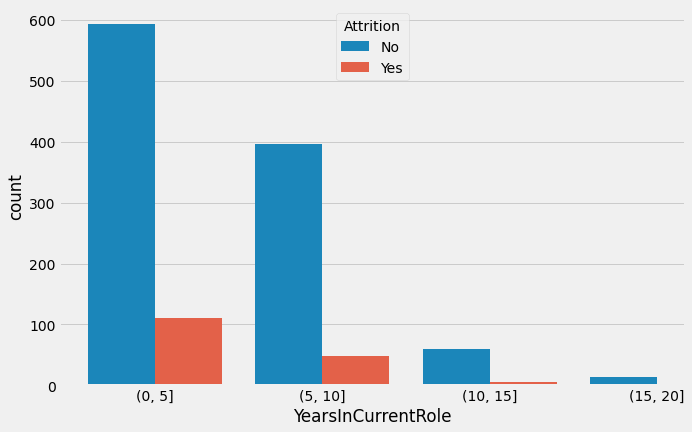

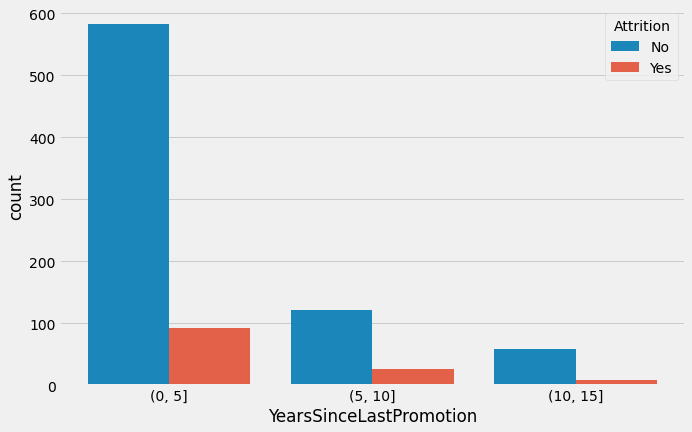

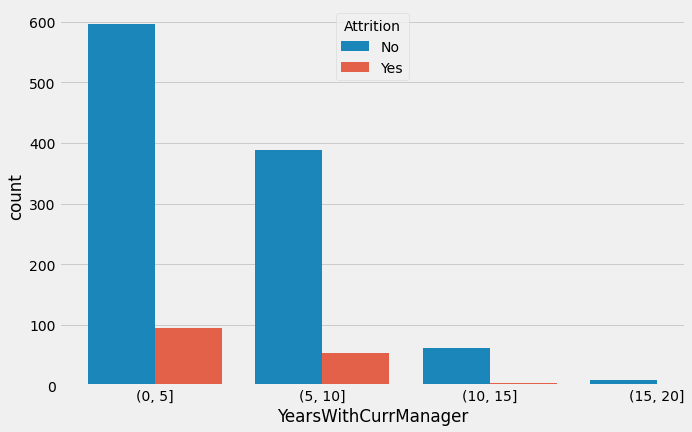

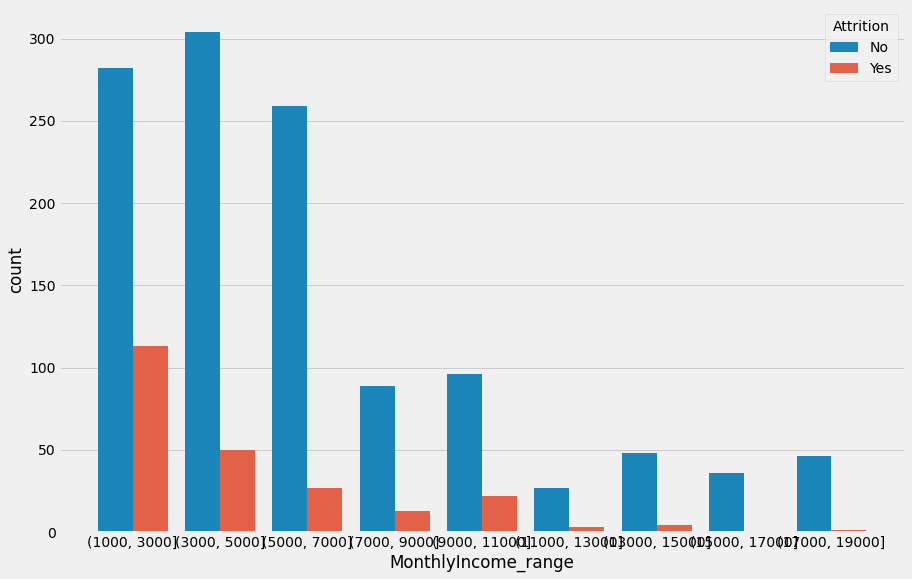

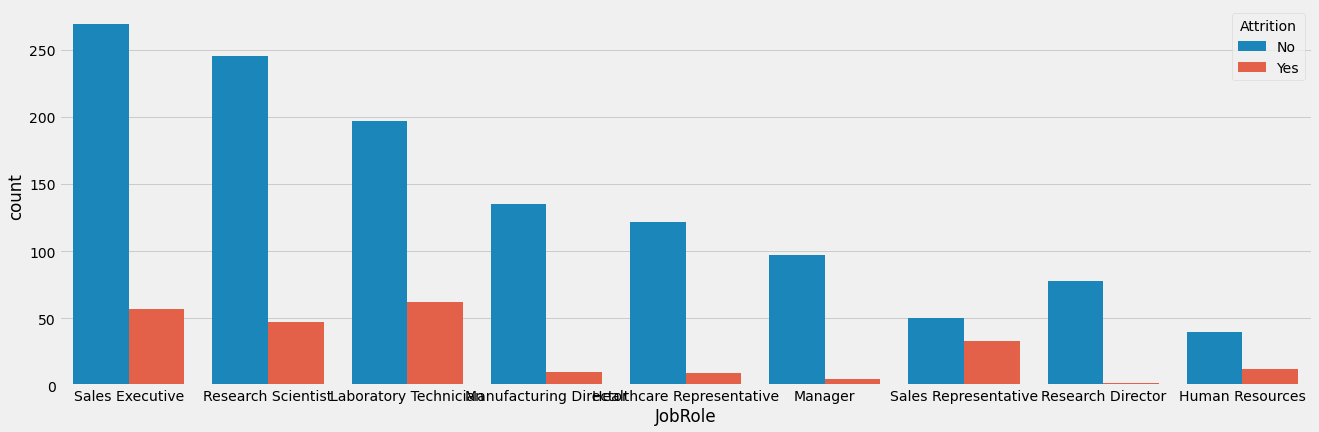

In [239]:
columns = ["BusinessTravel",'Department',"Education","EducationField",
           "EnvironmentSatisfaction","Gender","JobInvolvement","JobLevel","JobSatisfaction",
           "MaritalStatus","NumCompaniesWorked","OverTime","PercentSalaryHike",
           "PerformanceRating","RelationshipSatisfaction","StockOptionLevel",
           "TrainingTimesLastYear","WorkLifeBalance"]

for i in columns:
  fig_dims = (10, 6.5)
  fig, ax = plt.subplots(figsize=fig_dims)
  a= sns.countplot(x=i,ax=ax,data=df_1,hue="Attrition",hue_order=["No","Yes"])
  plt.show()

#為了讓圖片更清晰，另外畫Age、DistanceFromHome、MonthlyIncome、TotalWorkingYears、YearsAtCompany、YearsInCurrentRole、YearsSinceLastPromotion、YearsWithCurrManager、JobRole:
##Age
df_1['Age']=pd.cut(df_1['Age'],[18,20,25,30,35,40,45,50,55,60])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Age',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

##DistanceFromHome
df_1['DistanceFromHome']=pd.cut(df_1['DistanceFromHome'],[1,5,10,15,20,25,30])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='DistanceFromHome',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

##TotalWorkingYears
df_1['TotalWorkingYears']=pd.cut(df_1['TotalWorkingYears'],[0,5,10,15,20,25,30,35,40])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

#YearsAtCompany
df_1['YearsAtCompany']=pd.cut(df_1['YearsAtCompany'],[0,5,10,15,20,25,30,35,40])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='YearsAtCompany',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

#YearsInCurrentRole
df_1['YearsInCurrentRole']=pd.cut(df_1['YearsInCurrentRole'],[0,5,10,15,20])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

#YearsSinceLastPromotion
df_1['YearsSinceLastPromotion']=pd.cut(df_1['YearsSinceLastPromotion'],[0,5,10,15])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

#YearsWithCurrManager
df_1['YearsWithCurrManager']=pd.cut(df_1['YearsWithCurrManager'],[0,5,10,15,20])
fig_dims = (10,6.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

##MonthlyIncome
df_1['MonthlyIncome_range']=pd.cut(df_1['MonthlyIncome'],[1000,3000,5000,7000,9000,11000,13000,15000,17000,19000])
fig_dims = (13.5,9)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='MonthlyIncome_range',hue='Attrition',data=df_1,hue_order=["No","Yes"])
plt.plot()

##JobRole
fig_dims = (20, 6.5)
fig, ax = plt.subplots(figsize=fig_dims)
a= sns.countplot(x='JobRole',ax=ax,data=df,hue="Attrition",hue_order=["No","Yes"])
plt.show()

### B. Calculate the correlation between variables

In [240]:
corr=df.corr()
corr=(corr)
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [241]:
#Eliminate variables that only have one data level
temp = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        temp.append(col)
        df.drop(col,inplace=True,axis=1)
temp

['EmployeeCount', 'Over18', 'StandardHours']

I eliminated "Employee Count", "Over 18", and "Standard Hours" which only have unique data levels. And I also deleted "EmployeeNumber" because I thinked it didn't have relationship with whether the employee resigned or not.

In [242]:
df.drop(labels=['EmployeeNumber'],axis=1,inplace=True)
corr=df.corr()
corr=(corr)

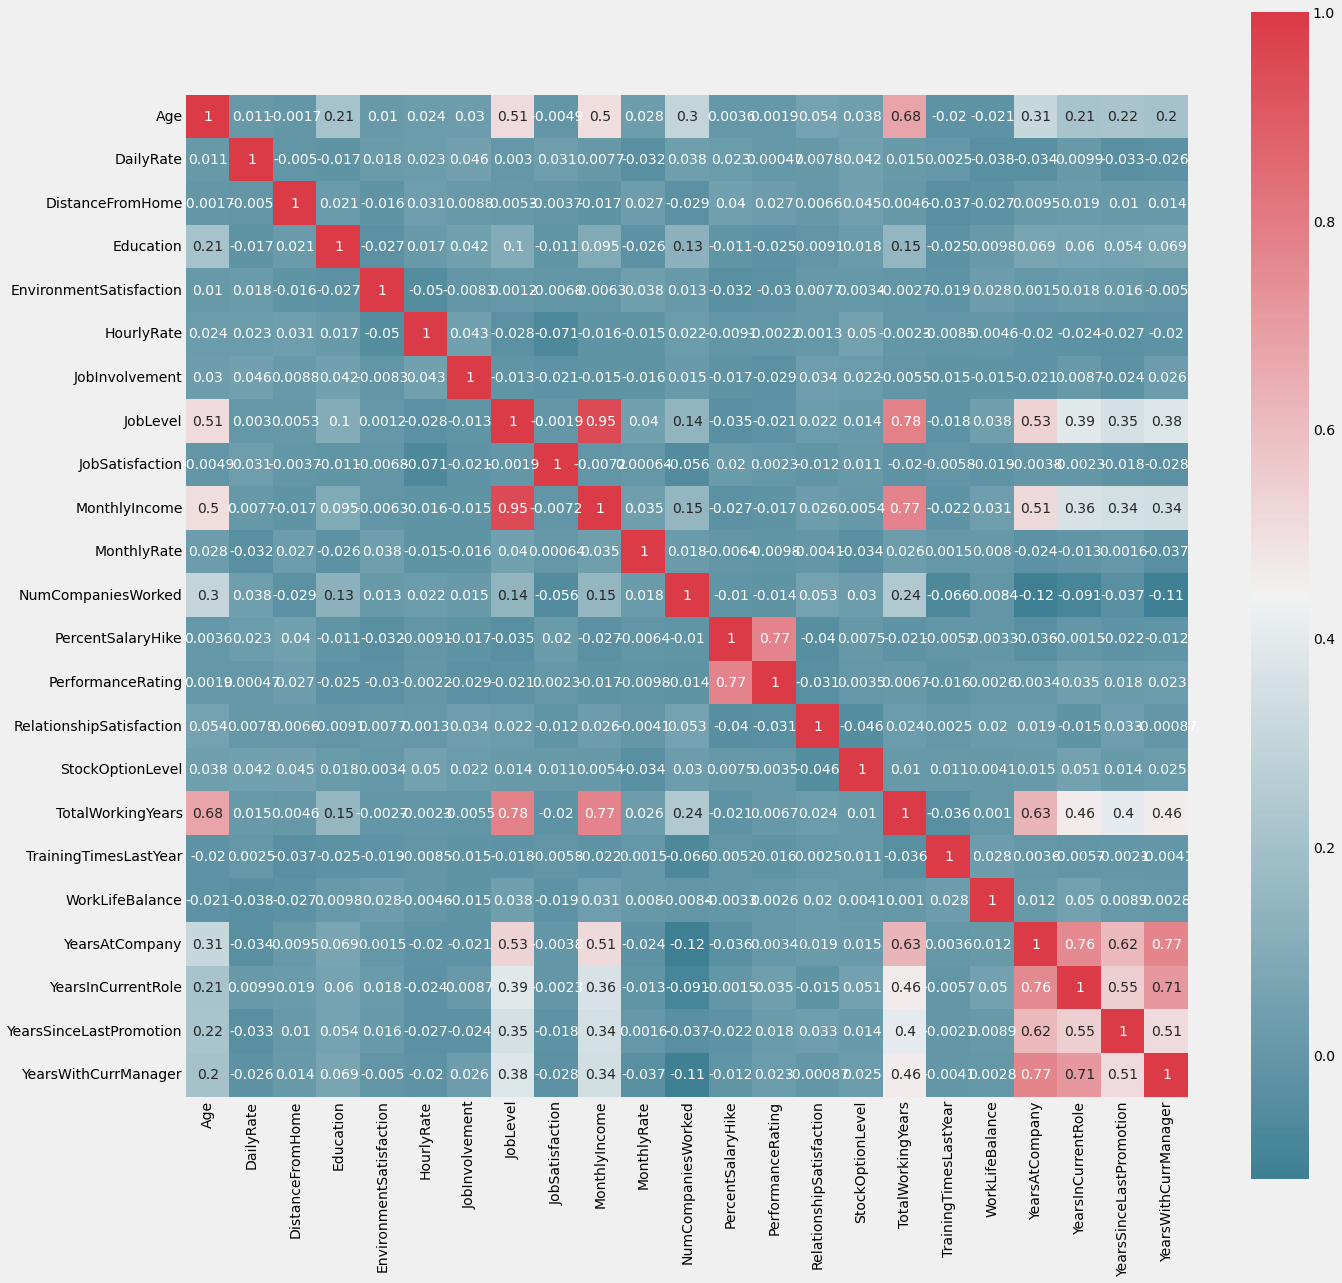

In [243]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

In [244]:
df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate'], axis = 1, inplace = True)

# II. Data Interpretation

### A. Human Resources have highest monthly income in non-managerial roles but didn't have lowest attrition rate.

In [245]:
Attrition={"Yes":1, 'No':0}
df.Attrition=[Attrition[item] for item in df.Attrition]

In [246]:
jobrole_income = df.groupby('JobRole', as_index=False)[['MonthlyIncome', 'Attrition']].mean().sort_values(by=['MonthlyIncome'])
jobrole_income

,JobRole,MonthlyIncome,Attrition
8,Sales Representative,2626.000000,0.397590
2,Laboratory Technician,3237.169884,0.239382
6,Research Scientist,3239.972603,0.160959
1,Human Resources,4235.750000,0.230769
7,Sales Executive,6924.279141,0.174847
4,Manufacturing Director,7295.137931,0.068966
0,Healthcare Representative,7528.763359,0.068702
5,Research Director,16033.550000,0.025000
3,Manager,17181.676471,0.049020


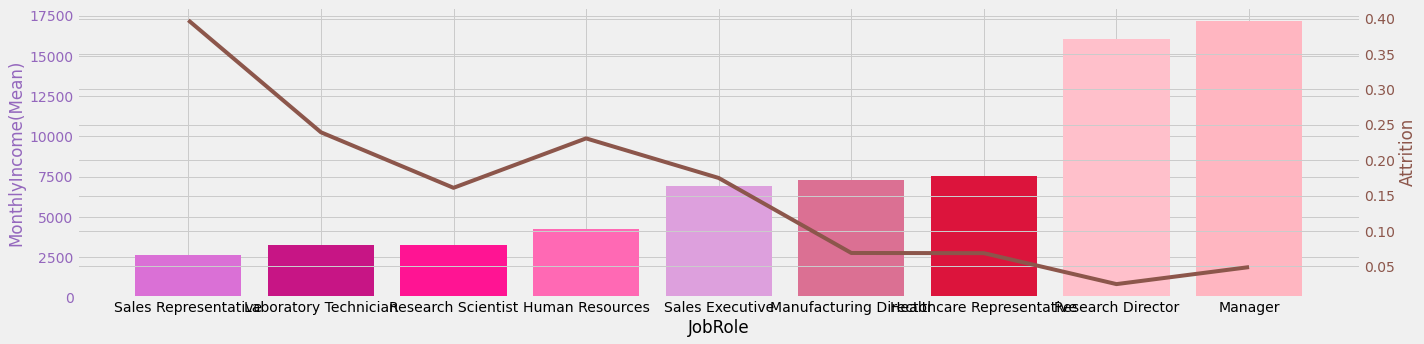

In [247]:
fig, ax1 = plt.subplots(figsize=(20,5))
color = 'tab:purple'
ax1.set_xlabel('JobRole')
ax1.set_ylabel('MonthlyIncome(Mean)',color=color)
ax1.bar(jobrole_income['JobRole'], jobrole_income['MonthlyIncome'],color=['orchid', 'mediumvioletred', 'deeppink', 'hotpink', 'plum'
                                                                   ,'palevioletred','crimson','pink','lightpink'])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
ax2.set_ylabel('Attrition', color=color)  # we already handled the x-label with ax1
ax2.plot(jobrole_income['JobRole'], jobrole_income['Attrition'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

[Pareto Chart reference](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py)

Then, we consider "YearSinceLasrPromotion". We found that Human Resources promotion is the fastest in non-managerial roles.

In [248]:
df.groupby('JobRole', as_index=False)[['YearsSinceLastPromotion']].mean().sort_values(by=['YearsSinceLastPromotion'])

,JobRole,YearsSinceLastPromotion
8,Sales Representative,1.060241
1,Human Resources,1.269231
2,Laboratory Technician,1.420849
6,Research Scientist,1.506849
4,Manufacturing Director,2.117241
7,Sales Executive,2.484663
0,Healthcare Representative,2.969466
5,Research Director,3.187500
3,Manager,4.833333


However, we found that Human Resources have the lowest satification toward their jobs.

In [249]:
df.groupby('JobRole', as_index=False)[['JobSatisfaction']].mean().sort_values(by=['JobSatisfaction'])

,JobRole,JobSatisfaction
1,Human Resources,2.557692
4,Manufacturing Director,2.682759
2,Laboratory Technician,2.691120
5,Research Director,2.700000
3,Manager,2.705882
8,Sales Representative,2.734940
7,Sales Executive,2.754601
6,Research Scientist,2.773973
0,Healthcare Representative,2.786260


Through we interview the employee, we can know the reasons why they didn't satisfy their jobs so they quit.

### B. Employees who worked in 2-4 companies are less likely to leave. Also, the females are inclined to have lower attrition than males when they have worked in over two companies.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


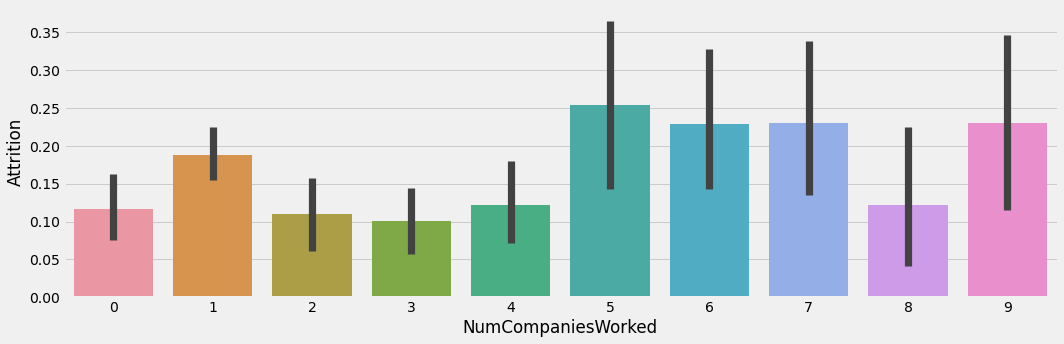

In [250]:
sns.factorplot(x = 'NumCompaniesWorked', y = 'Attrition', data=df, aspect= 3, kind = 'bar')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


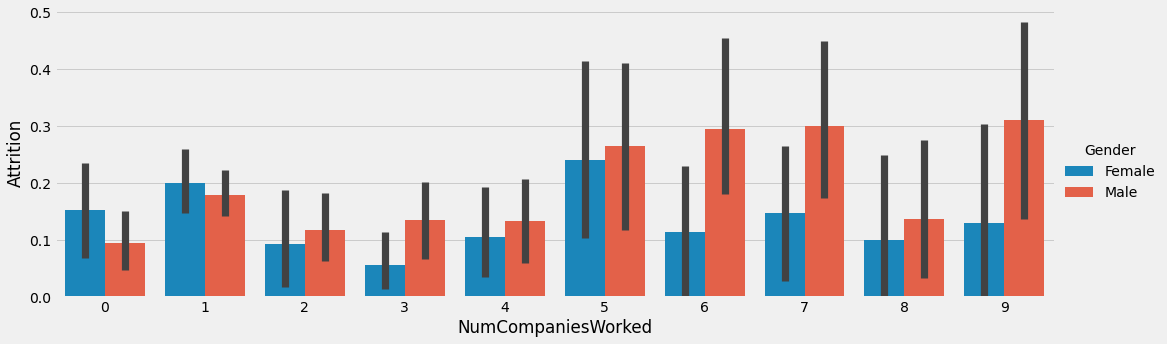

In [251]:
sns.factorplot(x = 'NumCompaniesWorked', y = 'Attrition', hue = 'Gender', data=df, aspect= 3, kind = 'bar')

### C. Doctors in every job level have a low attrition rate, but they have the highest attrition rate in the third job level.¶

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


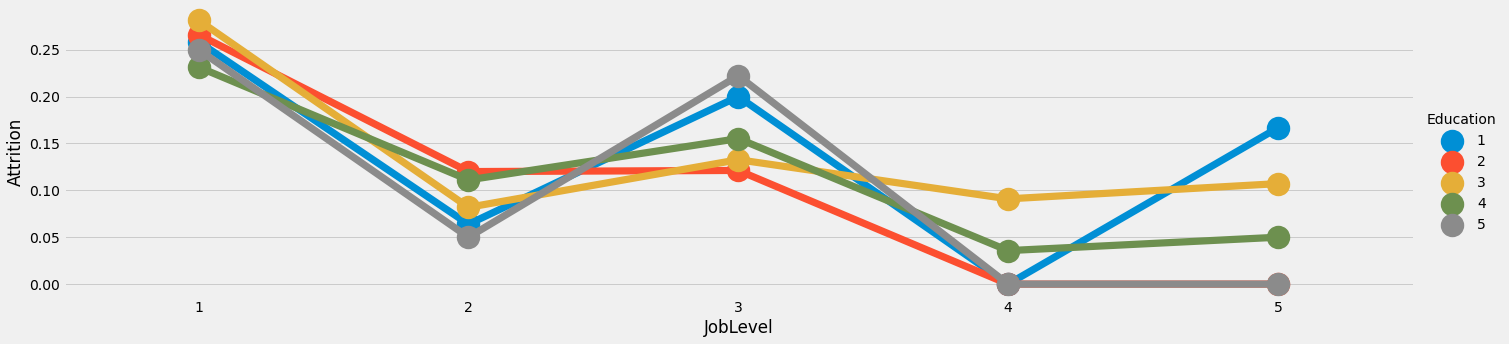

In [252]:
sns.factorplot(x = 'JobLevel', y = 'Attrition', hue = 'Education', data=df, aspect= 4, ci=None)

As we confirmed the job satisfaction, we can find that the doctors usually have the lowest job satisfaction :

In [253]:
df[df.JobLevel ==3].groupby('Education', as_index=False)[['JobSatisfaction']].mean().sort_values(by=['JobSatisfaction'])

,Education,JobSatisfaction
4,5,2.333333
3,4,2.655172
2,3,2.663265
1,2,2.787879
0,1,2.800000


In [254]:
df[df.JobLevel ==4].groupby('Education', as_index=False)[['YearsSinceLastPromotion']].mean().sort_values(by=['YearsSinceLastPromotion'])

,Education,YearsSinceLastPromotion
3,4,3.821429
1,2,4.823529
2,3,4.863636
4,5,5.555556
0,1,7.500000


We tracked down the reasons for the low job satisfaction of Ph. Ds, and found that it takes the most time for Ph. Ds to be promoted from job level three to job level four.

# III. Machine Learning

In [255]:
df1 = df
# Change Attrition to Yes or No to facilitate drawing decision tree diagrams later
Attrition = {1:"Yes", 0:'No'}
df.Attrition = [Attrition[item] for item in df.Attrition]

In [256]:
df1 = df 
df1 = pd.get_dummies(df, columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])

In [257]:
Gender = {'Male':1,'Female':0}
df1.Gender = [Gender[item] for item in df1.Gender]

OverTime = {'Yes':1, 'No':0}
df1.OverTime = [OverTime[item] for item in df1.OverTime]


df1.dtypes

Age                                   int64
Attrition                            object
DistanceFromHome                      int64
Education                             int64
EnvironmentSatisfaction               int64
Gender                                int64
JobInvolvement                        int64
JobLevel                              int64
JobSatisfaction                       int64
MonthlyIncome                         int64
NumCompaniesWorked                    int64
OverTime                              int64
PercentSalaryHike                     int64
PerformanceRating                     int64
RelationshipSatisfaction              int64
StockOptionLevel                      int64
TotalWorkingYears                     int64
TrainingTimesLastYear                 int64
WorkLifeBalance                       int64
YearsAtCompany                        int64
YearsInCurrentRole                    int64
YearsSinceLastPromotion               int64
YearsWithCurrManager            

## A. Analyze multicollinearity through variance inflation factor

Variance Inflation Factor assesses how much the variance of an estimated regression coefficient increase if your predictors are correlated. It looks at the extent to which an explanatory variable can be explained by all the other explanatory variables. If no factors are correlated, the VIF will be 1.

In [258]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
variable = df1[['Age', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = variable.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(variable.values, i) 
            for i in range(len(variable.columns))]

vif_data.sort_values(by='VIF',ascending=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
23,BusinessTravel_Travel_Frequently,inf
24,BusinessTravel_Travel_Rarely,inf
26,Department_Research & Development,inf
27,Department_Sales,inf
28,EducationField_Human Resources,inf
29,EducationField_Life Sciences,inf
30,EducationField_Marketing,inf
31,EducationField_Medical,inf
32,EducationField_Other,inf
33,EducationField_Technical Degree,inf


### B. Apply principle component analysis (PCA)

PCA may reduce the effect of multicolinearity, so I decided to investigate the impact with and without PCA.

In [259]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(variable)
features_pca = pca.fit_transform(variable)
print(features_pca.shape)

(1470, 2)


### C. Split the data to test set and training set


In [260]:
#split data
target_name = 'Attrition'

Attrition={'Yes':1,'No':0}
df1.Attrition=[Attrition[item] for item in df.Attrition]
BusinessTravel={'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2}
df1.BusinessTravel=[BusinessTravel[item] for item in df.BusinessTravel]
OverTime = {'Yes':1,'No':0}
df1.OverTime=[OverTime[item] for item in df.OverTime]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


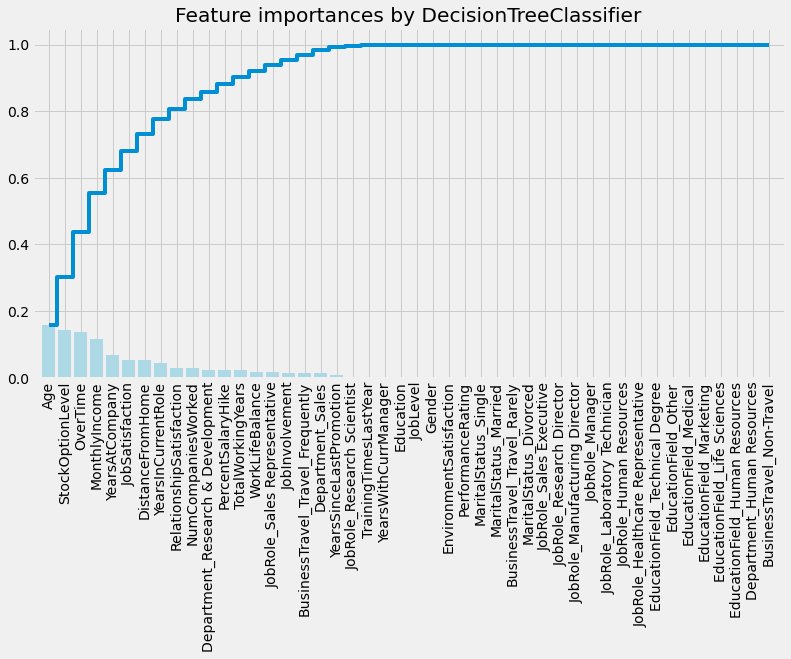

In [261]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Create train and test splits
target_name = 'Attrition'
X = df1.drop('Attrition', axis=1)

y=df[target_name]
X_train,X_test,y_train,t_test=train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df1.drop(['Attrition'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

By using a decision tree classifier, it could rank the features used for the prediction.

In [262]:
# Create an intercept term for the logistic regression equation
indep_var = ['Age','StockOptionLevel','OverTime','MonthlyIncome', 'YearsAtCompany','Attrition']
df1 = df1[indep_var]

# Create train and test splits
target_name = 'Attrition'
X = df1.drop('Attrition', axis=1)
X1 = features_pca

y=df1[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X1,y,test_size=0.15, random_state=123, stratify=y)

### D. Model selection

#### 1. Logistic Regression Model

In [263]:
# Before PCA
penalty = ['l2','none']
params_grid = {'penalty':penalty}
model1 = LogisticRegression()
grid_cv1 = GridSearchCV(model1 ,params_grid, cv=10)
grid_cv1.fit(X_train, y_train)
pred = grid_cv1.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print ("\n\n ---Logistic Model---")
logit_auc = accuracy_score(y_test,pred)
print (f"Logistic AUC : {logit_auc*100:.2f}%")
print(clf_report)

# After PCA
penalty = ['l2','none']
params_grid = {'penalty':penalty}
model1 = LogisticRegression()
grid_cv1 = GridSearchCV(model1 ,params_grid, cv=10)
grid_cv1.fit(X_train_pca, y_train_pca)
pred = grid_cv1.predict(X_test_pca)
clf_report = pd.DataFrame(classification_report(y_test_pca,pred,output_dict=True))
print ("\n\n ---Logistic Model---")
temp_acc = accuracy_score(y_test_pca,pred)
print (f"Logistic AUC : {temp_acc*100:.2f}%")
print(clf_report)

if (temp_acc <= logit_auc):
  grid_cv1.fit(X_train, y_train)
  pred = grid_cv1.predict(X_test)
  logit_auc = accuracy_score(y_test,pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 ---Logistic Model---
Logistic AUC : 83.71%
                    0          1  accuracy   macro avg  weighted avg
precision    0.840183   0.500000  0.837104    0.670091      0.784768
recall       0.994595   0.027778  0.837104    0.511186      0.837104
f1-score     0.910891   0.052632  0.837104    0.481761      0.771084
support    185.000000  36.000000  0.837104  221.000000    221.000000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)




 ---Logistic Model---
Logistic AUC : 83.71%
                    0     1  accuracy   macro avg  weighted avg
precision    0.837104   0.0  0.837104    0.418552      0.700743
recall       1.000000   0.0  0.837104    0.500000      0.837104
f1-score     0.911330   0.0  0.837104    0.455665      0.762878
support    185.000000  36.0  0.837104  221.000000    221.000000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


#### 2.Decision Tree Model

In [264]:
# Before PCA
max_depth = [5,10,15,20,'none']
class_weight = ["balanced"]
min_weight_fraction_leaf = [0.01]
params_grid = {'max_depth': max_depth,'class_weight':class_weight,'min_weight_fraction_leaf':min_weight_fraction_leaf}
model2=DecisionTreeClassifier()
grid_cv2= GridSearchCV(model2 ,params_grid, cv=10)
grid_cv2.fit(X_train, y_train)
pred = grid_cv2.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n\n ---Decision Tree Model ---")
dtree_auc = accuracy_score(y_test,pred)
print (f"Decision Tree AUC: {dtree_auc*100:.2f}%")
print(clf_report)

# After PCA
max_depth = [5,10,15,20,'none']
class_weight = ["balanced"]
min_weight_fraction_leaf = [0.01]
params_grid = {'max_depth': max_depth,'class_weight':class_weight,'min_weight_fraction_leaf':min_weight_fraction_leaf}
model2=DecisionTreeClassifier()
grid_cv2= GridSearchCV(model2 ,params_grid, cv=10)
grid_cv2.fit(X_train_pca, y_train_pca)
pred = grid_cv2.predict(X_test_pca)
clf_report = pd.DataFrame(classification_report(y_test_pca,pred,output_dict=True))
print("\n\n ---Decision Tree Model ---")
temp_acc = accuracy_score(y_test_pca,pred)
print (f"Decision Tree AUC: {temp_acc*100:.2f}%")
print(clf_report)

if (temp_acc <= logit_auc):
  grid_cv2.fit(X_train, y_train)
  pred = grid_cv2.predict(X_test)
  dtree_auc = accuracy_score(y_test,pred)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarni



 ---Decision Tree Model ---
Decision Tree AUC: 75.57%
                    0          1  accuracy   macro avg  weighted avg
precision    0.917197   0.359375  0.755656    0.638286      0.826330
recall       0.778378   0.638889  0.755656    0.708634      0.755656
f1-score     0.842105   0.460000  0.755656    0.651053      0.779862
support    185.000000  36.000000  0.755656  221.000000    221.000000


 ---Decision Tree Model ---
Decision Tree AUC: 62.44%
                    0          1  accuracy   macro avg  weighted avg
precision    0.864286   0.209877  0.624434    0.537081      0.757685
recall       0.654054   0.472222  0.624434    0.563138      0.624434
f1-score     0.744615   0.290598  0.624434    0.517607      0.670658
support    185.000000  36.000000  0.624434  221.000000    221.000000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarni

#### 3.Random forest model

In [265]:
# Before PCA
n_estimators = [100,1000]
min_samples_split = [10]
class_weight=['balanced']
params_grid = {'n_estimators': n_estimators,'min_samples_split':min_samples_split,'class_weight':class_weight}
model3=RandomForestClassifier()
grid_cv3 = GridSearchCV(model3 ,params_grid, cv=10)
grid_cv3.fit(X_train, y_train)
pred = grid_cv3.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n\n --- Random Forest Model ----")
rforest_auc = accuracy_score(y_test,pred)
print(f"Random forest AUC:{rforest_auc*100:.2f}%")
print(clf_report)

# After PCA
n_estimators = [100,1000]
min_samples_split = [10]
class_weight=['balanced']
params_grid = {'n_estimators': n_estimators,'min_samples_split':min_samples_split,'class_weight':class_weight}
model3=RandomForestClassifier()
grid_cv3 = GridSearchCV(model3 ,params_grid, cv=10)
grid_cv3.fit(X_train_pca, y_train_pca)
pred = grid_cv3.predict(X_test_pca)
clf_report = pd.DataFrame(classification_report(y_test_pca,pred,output_dict=True))
print("\n\n --- Random Forest Model ----")
temp_acc = accuracy_score(y_test_pca,pred)
print(f"Random forest AUC:{temp_acc*100:.2f}%")
print(clf_report)

if (temp_acc <= logit_auc):
  grid_cv3.fit(X_train, y_train)
  pred = grid_cv3.predict(X_test)
  rforest_auc = accuracy_score(y_test,pred)



 --- Random Forest Model ----
Random forest AUC:83.26%
                    0          1  accuracy   macro avg  weighted avg
precision    0.893617   0.484848  0.832579    0.689233      0.827030
recall       0.908108   0.444444  0.832579    0.676276      0.832579
f1-score     0.900804   0.463768  0.832579    0.682286      0.829613
support    185.000000  36.000000  0.832579  221.000000    221.000000


 --- Random Forest Model ----
Random forest AUC:79.19%
                    0          1  accuracy   macro avg  weighted avg
precision    0.842365   0.222222  0.791855    0.532293      0.741346
recall       0.924324   0.111111  0.791855    0.517718      0.791855
f1-score     0.881443   0.148148  0.791855    0.514796      0.761993
support    185.000000  36.000000  0.791855  221.000000    221.000000


#### 4. XGBoost

In [266]:
# Before PCA
n_estimators = [100, 500]
params_grid = {'n_estimators': n_estimators}
clf = XGBClassifier()
grid_cv4 = GridSearchCV(clf, params_grid, scoring="f1", cv=5, verbose=3, n_jobs=-1)
grid_cv4.fit(X_train, y_train)
pred = grid_cv4.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n\n --- Random Forest Model ----")
xgb_auc = accuracy_score(y_test,pred)
print(f"Random forest AUC:{xgb_auc*100:.2f}%")
print(clf_report)

# After PCA
clf = XGBClassifier()
grid_cv4 = GridSearchCV(clf, params_grid, scoring="f1", cv=5, verbose=3, n_jobs=-1)
grid_cv4.fit(X_train_pca, y_train_pca)
pred = grid_cv4.predict(X_test_pca)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n\n --- Random Forest Model ----")
temp_acc = accuracy_score(y_test,pred)
print(f"Random forest AUC:{temp_acc*100:.2f}%")
print(clf_report)

if (temp_acc <= xgb_auc):
  grid_cv4.fit(X_train, y_train)
  pred = grid_cv4.predict(X_test)
  xgb_auc = accuracy_score(y_test,pred)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished




 --- Random Forest Model ----
Random forest AUC:82.81%
                    0          1  accuracy   macro avg  weighted avg
precision    0.865672   0.450000  0.828054    0.657836      0.797960
recall       0.940541   0.250000  0.828054    0.595270      0.828054
f1-score     0.901554   0.321429  0.828054    0.611491      0.807054
support    185.000000  36.000000  0.828054  221.000000    221.000000
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished




 --- Random Forest Model ----
Random forest AUC:81.45%
                    0     1  accuracy   macro avg  weighted avg
precision    0.833333   0.0   0.81448    0.416667      0.697587
recall       0.972973   0.0   0.81448    0.486486      0.814480
f1-score     0.897756   0.0   0.81448    0.448878      0.751515
support    185.000000  36.0   0.81448  221.000000    221.000000
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


#### 5. Gradient boosting classifier

In [267]:
# Before PCA
n_estimators = [100, 500]
params_grid = {'n_estimators': n_estimators}
clf = GradientBoostingClassifier()
grid_cv5 = GridSearchCV(clf, params_grid, scoring="f1", cv=5, verbose=3, n_jobs=-1)
grid_cv5.fit(X_train, y_train)
pred = grid_cv5.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n\n --- Random Forest Model ----")
gb_auc = accuracy_score(y_test,pred)
print(f"Random forest AUC:{gb_auc*100:.2f}%")
print(clf_report)

# After PCA
n_estimators = [100, 500]
params_grid = {'n_estimators': n_estimators}
clf = GradientBoostingClassifier()
grid_cv5 = GridSearchCV(clf, params_grid, scoring="f1", cv=5, verbose=3, n_jobs=-1)
grid_cv5.fit(X_train_pca, y_train_pca)
pred = grid_cv5.predict(X_test_pca)
clf_report = pd.DataFrame(classification_report(y_test_pca,pred,output_dict=True))
print("\n\n --- Random Forest Model ----")
temp_acc = accuracy_score(y_test_pca,pred)
print(f"Random forest AUC:{temp_acc*100:.2f}%")
print(clf_report)

if (temp_acc <= gb_auc):
  grid_cv5.fit(X_train, y_train)
  pred = grid_cv5.predict(X_test)
  gb_auc = accuracy_score(y_test,pred)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished




 --- Random Forest Model ----
Random forest AUC:83.26%
                    0          1  accuracy   macro avg  weighted avg
precision    0.873737   0.478261  0.832579    0.675999      0.809316
recall       0.935135   0.305556  0.832579    0.620345      0.832579
f1-score     0.903394   0.372881  0.832579    0.638138      0.816976
support    185.000000  36.000000  0.832579  221.000000    221.000000
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished




 --- Random Forest Model ----
Random forest AUC:79.64%
                    0          1  accuracy   macro avg  weighted avg
precision    0.839806   0.200000   0.79638    0.519903      0.735584
recall       0.935135   0.083333   0.79638    0.509234      0.796380
f1-score     0.884910   0.117647   0.79638    0.501279      0.759926
support    185.000000  36.000000   0.79638  221.000000    221.000000
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


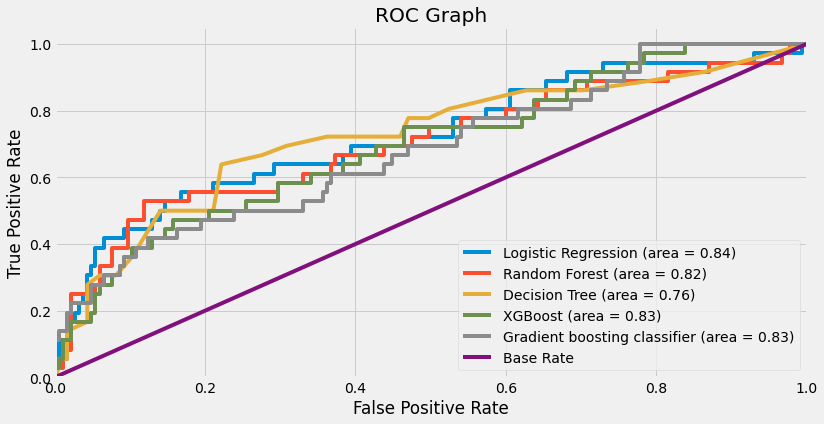

In [268]:
# Create ROC Graph
fpr, tpr, thresholds = roc_curve(y_test, grid_cv1.predict_proba(X_test)[:,1])
#The first column is the probability that the entry has the -1 label 
#and the second column is the probability that the entry has the +1 label.
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, grid_cv3.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, grid_cv2.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, grid_cv4.predict_proba(X_test)[:,1])
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, grid_cv5.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rforest_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dtree_auc)

# Plot XGBoost ROC
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (area = %0.2f)' % xgb_auc)

# Plot Gradient boosting classifier ROC
plt.plot(gb_fpr, gb_tpr, label='Gradient boosting classifier (area = %0.2f)' % gb_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()